## 1. Importación de datos



Los datos de cada tienda están disponibles en archivos CSV y se cargarán utilizando el código base ya proporcionado. El código extrae información de las cuatro tiendas y organiza los datos en DataFrames utilizando la biblioteca Pandas.

In [ ]:
# Importamos la librería pandas para trabajar con DataFrames
import pandas as pd

# URLs de los archivos CSV que contienen los datos de cada tienda
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leemos los datos de cada tienda y los guard tv amos en DataFrames separados
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Mostramos las primeras filas del DataFrame 'tienda' para tener una vista previa de los datos
#tienda.head()

## 2. Ingreso total por cada tienda

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [ ]:
# Creamos una lista llamada 'tiendas_completas' que contiene los DataFrames de las cuatro tiendas
tiendas_completas = [tienda,tienda2,tienda3,tienda4]

In [ ]:
for i, t in enumerate(tiendas_completas, 1):
    ingresos = t["Precio"].sum()  # Calculamos los ingresos totales de la tienda actual sumando los valores de la columna "Precio"
    ingresos = "${:,.2f}".format(ingresos)
    print(f"\n Ingresos de la Tienda {i}: {ingresos}")


 Ingresos de la Tienda 1: $1,150,880,400.00

 Ingresos de la Tienda 2: $1,116,343,500.00

 Ingresos de la Tienda 3: $1,098,019,600.00

 Ingresos de la Tienda 4: $1,038,375,700.00


La tienda con mayor ingresos es la tienda N°1, con un total de: $1.150.880.400.00

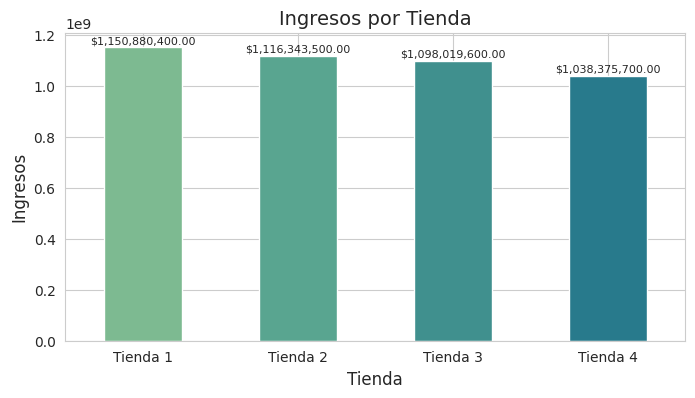

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ... (código para obtener los ingresos por tienda) ...

# Crear un DataFrame con los ingresos por tienda
ingresos_por_tienda = pd.DataFrame({'Tienda': [f"Tienda {i}" for i in range(1, 5)],
                                     'Ingresos': [tienda["Precio"].sum(), tienda2["Precio"].sum(),
                                                  tienda3["Precio"].sum(), tienda4["Precio"].sum()]})

# Obtener colores de la paleta 'crest' de Seaborn
colors = sns.color_palette('crest')[:4]  # Tomar los primeros 4 colores

# Crear el gráfico de barras con color personalizado y figsize, sin leyenda
ax = ingresos_por_tienda.plot.bar(x='Tienda', y='Ingresos', rot=0, color=colors, figsize=(8, 4), legend=False)  # legend=False aquí

# Agregar valores dentro de las barras con tamaño de fuente ajustado
for p in ax.patches:
    ax.annotate("${:,.2f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)  # Ajusta fontsize aquí

# Personalizar el gráfico con tamaño de fuente ajustado
plt.title("Ingresos por Tienda", fontsize=14)  # Ajusta fontsize aquí
plt.ylabel("Ingresos", fontsize=12)  # Ajusta fontsize aquí
plt.xlabel("Tienda", fontsize=12)  # Ajusta fontsize aquí

plt.show()

## 3. Ventas por categoría

En este punto se debe calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

**Ventas por categoría con cantidad de ventas e ingresos totales**

In [ ]:
# Ventas por categoría con cantidad de ventas de cada tipo
for i, t in enumerate(tiendas_completas, 1):
    # Agrupamos por categoría y calculamos la suma del precio y el conteo de productos
    ventas = t.groupby("Categoría del Producto").agg({"Precio": "sum", "Producto": "count"})
    ventas = ventas.sort_values("Precio", ascending=False)  # Ordenamos por precio
    ventas = ventas.rename(columns={"Precio": "Ventas Totales", "Producto": "Cantidad de Ventas"})  # Renombramos columnas

    print(f"\n Ventas Tienda {i} por Categoria")

    # Aplicamos formato de moneda a la columna "Ventas Totales"
    ventas["Ventas Totales"] = ventas["Ventas Totales"].map(lambda x: "${:,.2f}".format(x))

    print(ventas)


 Ventas Tienda 1 por Categoria
                          Ventas Totales  Cantidad de Ventas
Categoría del Producto                                      
Electrónicos             $429,493,500.00                 448
Electrodomésticos        $363,685,200.00                 312
Muebles                  $187,633,700.00                 465
Instrumentos musicales    $91,299,000.00                 182
Deportes y diversión      $39,290,000.00                 284
Juguetes                  $17,995,700.00                 324
Artículos para el hogar   $12,698,400.00                 171
Libros                     $8,784,900.00                 173

 Ventas Tienda 2 por Categoria
                          Ventas Totales  Cantidad de Ventas
Categoría del Producto                                      
Electrónicos             $410,831,100.00                 422
Electrodomésticos        $348,567,800.00                 305
Muebles                  $176,426,300.00                 442
Instrumentos musicale

En la Tienda N°1, la categoría con mas ingresos por ventas fue: **Electrónicos** con un valor en ventas totales de **$429,493,500.00** y con **448** unidades vendidas

En la Tienda N°2, la categoría con mas ingresos por ventas fue: **Electrónicos** con un valor en ventas totales de **$410,831,100.00** y con **422** unidades vendidas

En la Tienda N°3, la categoría con mas ingresos por ventas fue: **Electrónicos** con un valor en ventas totales de **$410,775,800.00** y con **451** unidades vendidas

En la Tienda N°4, la categoría con mas ingresos por ventas fue: **Electrónicos** con un valor en ventas totales de **$409,476,100.00** y con **451** unidades vendidas

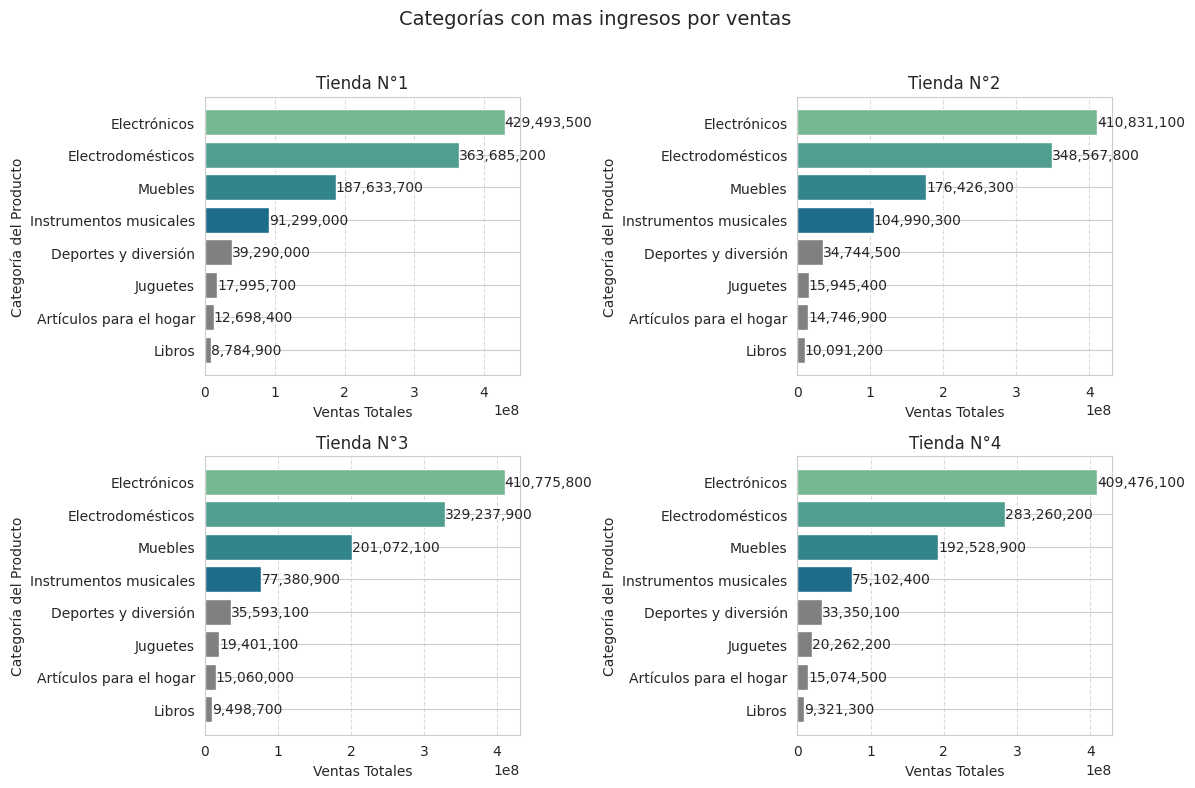

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (código para cargar los datos de las tiendas) ...

# Colores personalizados para categorías usando la paleta "crest" de Seaborn
colores_por_categoria = dict(zip(
    ["Electrónicos", "Electrodomésticos", "Muebles", "Instrumentos musicales", "otros"],
    sns.color_palette("crest", n_colors=5)  # Obtener 5 colores de la paleta "crest"
))

# Función para graficar varias tiendas en subgráficos con orden y colores personalizados
def graficar_tiendas(dataframes, nombres_tiendas):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas, 2 columnas
    fig.suptitle('Categorías con mas ingresos por ventas', fontsize=14)

    for ax, df, nombre_tienda in zip(axes.flatten(), dataframes, nombres_tiendas):
        ventas_por_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
        ventas_por_categoria = ventas_por_categoria.sort_values(ascending=False)  # Orden de mayor a menor

        categorias = ventas_por_categoria.index
        ventas = ventas_por_categoria.values
        colores = [colores_por_categoria.get(categoria, "gray") for categoria in categorias]  # Color según categoría

        ax.barh(categorias, ventas, color=colores)  # Usar los colores de Seaborn
        ax.set_title(nombre_tienda, fontsize=12)
        ax.set_xlabel('Ventas Totales')
        ax.set_ylabel('Categoría del Producto')
        ax.invert_yaxis()
        ax.grid(axis='x', linestyle='--', alpha=0.7)

        # Mostrar valores en las barras
        for i, v in enumerate(ventas):
            ax.text(v, i, f"{int(v):,}", va='center', ha='left')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta para evitar solapamientos
    plt.show()

# Lista de DataFrames y nombres de tiendas
dataframes = [tienda, tienda2, tienda3, tienda4] # Asegúrate de usar los nombres de los DataFrames que cargaste
nombres_tiendas = ["Tienda N°1", "Tienda N°2", "Tienda N°3", "Tienda N°4"]

# Aplicar la función para graficar todas las tiendas
graficar_tiendas(dataframes, nombres_tiendas)

In [ ]:
all_tiendas_df = pd.concat([tienda, tienda2, tienda3, tienda4])# combina la información de las cuatro tiendas en un único DataFrame

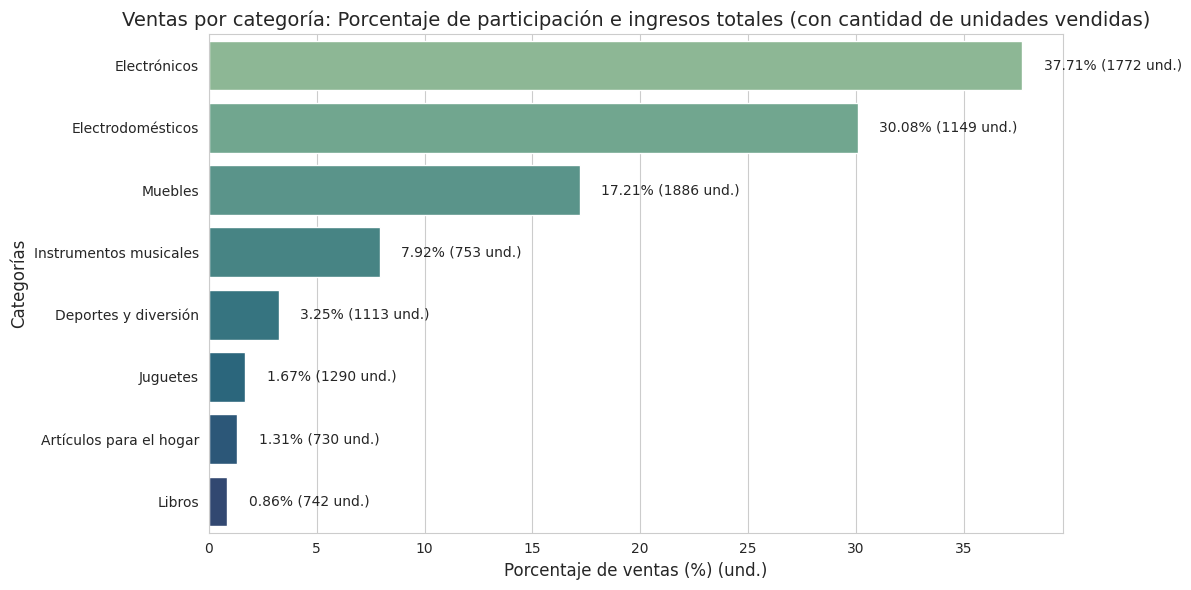

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ... (código para cargar los datos y crear tiendas_completas) ...

# Crear una lista para almacenar los datos de todas las tiendas
all_data = []

for i, t in enumerate(tiendas_completas, 1):
    # Agrupamos por categoría y calculamos la suma del precio y el conteo de productos
    ventas = t.groupby("Categoría del Producto").agg({"Precio": "sum", "Producto": "count"})
    ventas = ventas.sort_values("Precio", ascending=False)  # Ordenamos por ingresos totales
    ventas = ventas.rename(columns={"Precio": "Ventas Totales", "Producto": "Cantidad de Ventas"})
    ventas['Tienda'] = f"Tienda {i}"
    all_data.append(ventas)

total_ventas_ingresos = pd.concat(all_data)
total_ventas_ingresos = total_ventas_ingresos.groupby('Categoría del Producto').agg({'Ventas Totales':'sum','Cantidad de Ventas':'sum'})
total_ventas_ingresos = total_ventas_ingresos.sort_values('Ventas Totales',ascending=False)
total_ventas_ingresos['Porcentaje'] = (total_ventas_ingresos['Ventas Totales'] / total_ventas_ingresos['Ventas Totales'].sum()) * 100
total_ventas_ingresos = total_ventas_ingresos.reset_index()


# Crear el gráfico con Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Extender la paleta 'crest' a 8 colores
colors = sns.color_palette('crest', n_colors=8)

# Crear el gráfico de barras horizontales con porcentajes y colores personalizados
ax = sns.barplot(data=total_ventas_ingresos, x='Porcentaje', y='Categoría del Producto', hue='Categoría del Producto', palette=colors, orient='h', legend=False, dodge=False)

# Agregar etiquetas de porcentaje y número de productos a la derecha de las barras
for index, row in total_ventas_ingresos.iterrows():
    width = row['Porcentaje']
    categoria = row['Categoría del Producto']
    num_productos = row['Cantidad de Ventas']  # Obtener la cantidad de ventas de la fila actual
    ax.annotate(f'{width:.2f}% ({num_productos} und.)', (width + 1, index), ha='left', va='center', fontsize=10)

# Personalizar el gráfico
plt.title('Ventas por categoría: Porcentaje de participación e ingresos totales (con cantidad de unidades vendidas)', fontsize=14)
plt.xlabel('Porcentaje de ventas (%) (und.)', fontsize=12)
plt.ylabel('Categorías', fontsize=12)
plt.tight_layout()
plt.show()

**Top N categorías más populares por cantidad de ventas con sus ingresos totales** (Top N definido por usuario)

In [ ]:
# Ventas por categoría (Top N categorías más populares)
for i, t in enumerate(tiendas_completas, 1):
    top_n = 5  # Define la cantidad de categorías a mostrar (top N)

    # Agrupamos por categoría, calculamos la suma del precio y el conteo de productos
    ventas_por_categoria = t.groupby("Categoría del Producto").agg({"Producto": "count", "Precio": "sum"})
    ventas_por_categoria = ventas_por_categoria.sort_values("Producto", ascending=False).head(top_n)  # Ordenamos por cantidad de productos vendidos
    ventas_por_categoria = ventas_por_categoria.rename(columns={"Producto": "Cantidad de Ventas", "Precio": "Ventas Totales"})  # Renombramos columnas

    # Aplicamos formato de moneda a la columna "Ventas Totales"
    ventas_por_categoria["Ventas Totales"] = ventas_por_categoria["Ventas Totales"].map(lambda x: "${:,.2f}".format(x))

    # Imprimimos el resultado
    print(f"\nTop {top_n} categorías más populares en la Tienda {i}:")  # Incluimos top_n en el mensaje
    print(ventas_por_categoria)


Top 5 categorías más populares en la Tienda 1:
                        Cantidad de Ventas   Ventas Totales
Categoría del Producto                                     
Muebles                                465  $187,633,700.00
Electrónicos                           448  $429,493,500.00
Juguetes                               324   $17,995,700.00
Electrodomésticos                      312  $363,685,200.00
Deportes y diversión                   284   $39,290,000.00

Top 5 categorías más populares en la Tienda 2:
                        Cantidad de Ventas   Ventas Totales
Categoría del Producto                                     
Muebles                                442  $176,426,300.00
Electrónicos                           422  $410,831,100.00
Juguetes                               313   $15,945,400.00
Electrodomésticos                      305  $348,567,800.00
Deportes y diversión                   275   $34,744,500.00

Top 5 categorías más populares en la Tienda 3:
                

En la Tienda N°1, la categoría más vendida fue: **Muebles** con **465** unidades con un valor en ventas totales de **$187,633,700.00**

En la Tienda N°2, la categoría más vendida fue: **Muebles** con **442** unidades con un valor en ventas totales de **$176,426,300.00**

En la Tienda N°3, la categoría más vendida fue: **Muebles** con **499** unidades con un valor en ventas totales de **$201,072,100.00**

En la Tienda N°4, la categoría más vendida fue: **Muebles** con **480** unidades con un valor en ventas totales de **$192,528,900.00**

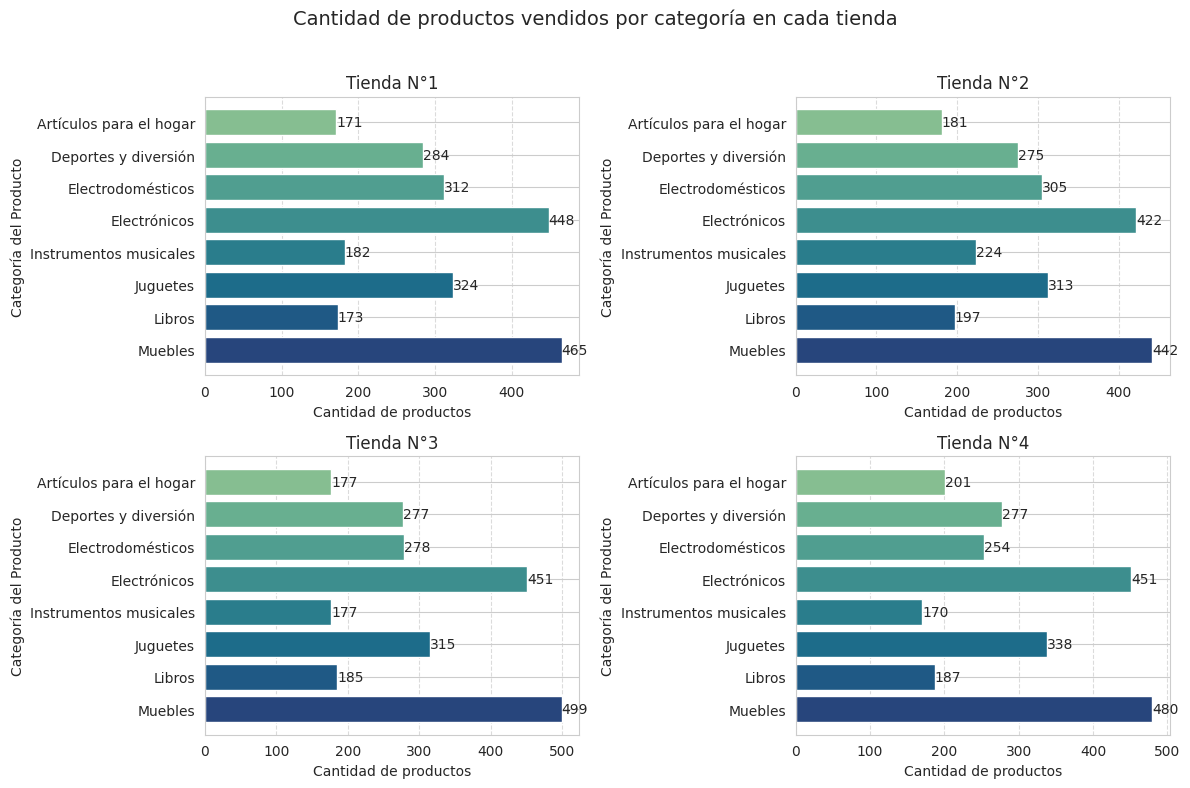

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ... (código para cargar los datos de las tiendas: tienda, tienda2, tienda3, tienda4) ...

# Función para graficar la cantidad de productos por categoría en cada tienda
def graficar_cantidad_productos_por_categoria(dataframes, nombres_tiendas):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas, 2 columnas
    fig.suptitle('Cantidad de productos vendidos por categoría en cada tienda', fontsize=14)

    # Obtener colores de la paleta 'crest' de Seaborn
    num_categorias = len(pd.concat(dataframes)['Categoría del Producto'].unique())  # Número total de categorías
    colores = sns.color_palette("crest", n_colors=num_categorias)

    for ax, df, nombre_tienda in zip(axes.flatten(), dataframes, nombres_tiendas):
        # Obtener la cantidad de productos por categoría
        cantidad_por_categoria = df.groupby('Categoría del Producto')['Producto'].count()

        # Crear el gráfico de barras horizontales con colores de Seaborn
        ax.barh(cantidad_por_categoria.index, cantidad_por_categoria.values, color=colores)
        ax.set_title(nombre_tienda, fontsize=12)
        ax.set_xlabel('Cantidad de productos')
        ax.set_ylabel('Categoría del Producto')
        ax.invert_yaxis()
        ax.grid(axis='x', linestyle='--', alpha=0.7)

        # Mostrar valores en las barras
        for i, v in enumerate(cantidad_por_categoria.values):
            ax.text(v, i, f"{int(v):,}", va='center', ha='left')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta para evitar solapamientos
    plt.show()

# Lista de DataFrames y nombres de tiendas
dataframes = [tienda, tienda2, tienda3, tienda4]  # Reemplaza con tus DataFrames
nombres_tiendas = ["Tienda N°1", "Tienda N°2", "Tienda N°3", "Tienda N°4"]

# Llamar a la función para graficar la cantidad de productos por categoría
graficar_cantidad_productos_por_categoria(dataframes, nombres_tiendas)

**Top N productos con mayores ingresos totales** (Top N definido por usuario)

In [ ]:
#Ventas por categoría - Productos con mas ingresos
# Productos con más ingresos (Top N)
for i, t in enumerate(tiendas_completas, 1):
    top_n = 5  # Define la cantidad de productos a mostrar (top N)

    # Agrupamos por producto, sumamos el precio y contamos las ventas
    productos_mas_vendidos = t.groupby("Producto").agg({"Precio": "sum", "Producto": "count"})
    productos_mas_vendidos = productos_mas_vendidos.sort_values("Precio", ascending=False).head(top_n)
    productos_mas_vendidos = productos_mas_vendidos.rename(columns={"Precio": "Ingresos Totales", "Producto": "Cantidad de Ventas"})

    # Imprimimos el resultado
    print(f"\nTop {top_n} productos con más ingresos en la Tienda {i}:")

    # Aplicamos formato de moneda a la columna "Ingresos Totales"
    productos_mas_vendidos["Ingresos Totales"] = productos_mas_vendidos["Ingresos Totales"].map(lambda x: "${:,.2f}".format(x))
    print(productos_mas_vendidos)


Top 5 productos con más ingresos en la Tienda 1:
                 Ingresos Totales  Cantidad de Ventas
Producto                                             
TV LED UHD 4K     $142,150,200.00                  60
Refrigerador      $112,143,300.00                  54
Iphone 15          $97,902,200.00                  49
Smart TV           $67,452,100.00                  44
Lavadora de ropa   $65,783,600.00                  47

Top 5 productos con más ingresos en la Tienda 2:
                 Ingresos Totales  Cantidad de Ventas
Producto                                             
Iphone 15         $113,225,800.00                  55
TV LED UHD 4K     $103,375,000.00                  45
Refrigerador       $97,632,500.00                  49
Lavadora de ropa   $66,762,300.00                  49
Smart TV           $61,142,000.00                  40

Top 5 productos con más ingresos en la Tienda 3:
              Ingresos Totales  Cantidad de Ventas
Producto                                   

# 3. Calificación promedio de la tienda


Calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
# Calcular las calificaciones promedio de los clientes para cada tienda.
calificaciones_promedio_tiendas = []  # Variable global para almacenar las calificaciones promedio

for i, tienda_df in enumerate(tiendas_completas, 1):
    calificacion_promedio = tienda_df["Calificación"].mean().round(2)  # Calcula la calificación promedio para la tienda actual
    calificaciones_promedio_tiendas.append(calificacion_promedio)  # Agregar a la lista
    print(f"\n Calificación promedio de la Tienda {i}: {calificacion_promedio}")


 Calificación promedio de la Tienda 1: 3.98

 Calificación promedio de la Tienda 2: 4.04

 Calificación promedio de la Tienda 3: 4.05

 Calificación promedio de la Tienda 4: 4.0


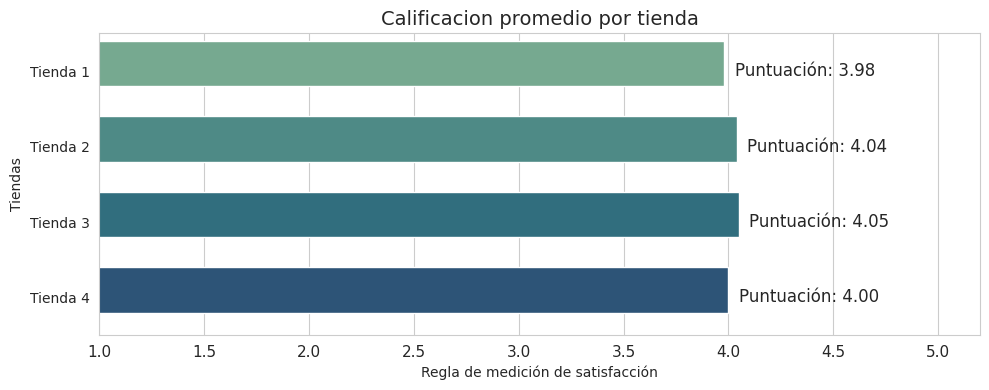

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (código para cargar los datos de las tiendas) ... si es necesario

# Crear DataFrame para el gráfico (usando la variable global calificaciones_promedio_tiendas)
calificaciones_promedio_df = pd.DataFrame({'Tienda': [f"Tienda {i}" for i in range(1, 5)],
                                            'Calificación': calificaciones_promedio_tiendas})

# Estilo y tamaño de la figura
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))

# Crear el gráfico de barras horizontales con grosor reducido
ax = sns.barplot(data=calificaciones_promedio_df, y='Tienda', x='Calificación', hue='Tienda', legend=False, palette='crest', height=0.6)

# Título y etiquetas
plt.title('Calificacion promedio por tienda', fontsize=14)
plt.xlabel('Regla de medición de satisfacción')
plt.ylabel('Tiendas')
plt.xticks(ticks=[x * 0.5 for x in range(2, 11)], fontsize=11)
plt.xlim(1, 5.2)

# Mostrar valores al final de cada barra
for i, valor in enumerate(calificaciones_promedio_df['Calificación']):
    ax.text(valor + 0.05, i, f'Puntuación: {valor:,.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

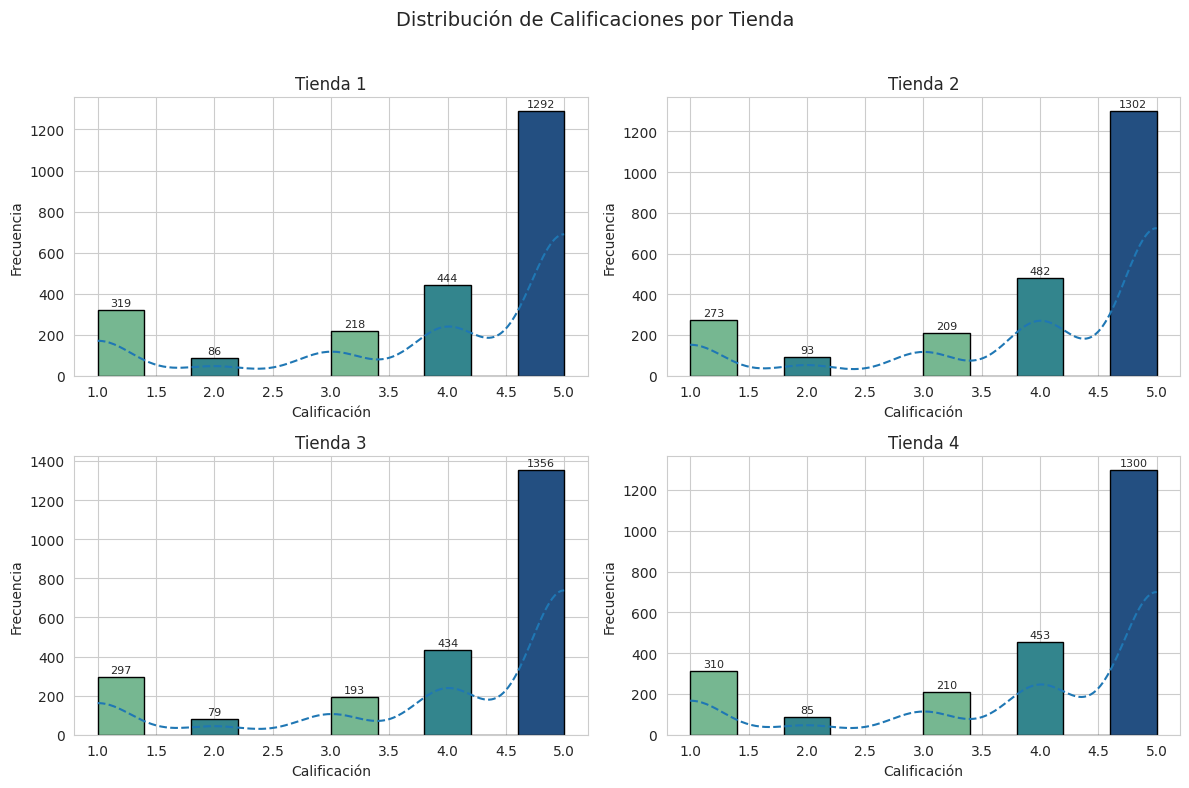

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes los DataFrames: tienda, tienda2, tienda3, tienda4

# Colores personalizados para las calificaciones usando la paleta "crest" de Seaborn
colores_calificacion = sns.color_palette("crest", n_colors=5)  # Asumiendo 5 niveles de calificación

def analizar_distribucion_calificaciones(tiendas, nombres_tiendas):

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas, 2 columnas
    fig.suptitle('Distribución de Calificaciones por Tienda', fontsize=14)

    for i, t in enumerate(tiendas):
        nombre_tienda = nombres_tiendas[i]
        ax = axes.flatten()[i]  # Selecciona el subplot correcto

        # Grafica la distribución de las calificaciones usando un histograma con la línea de densidad
        sns.histplot(data=t, x='Calificación', kde=True, bins=10, edgecolor='black', ax=ax, line_kws={'color': 'red','linestyle': '--'})


        ax.set_title(nombre_tienda, fontsize=12)
        ax.set_xlabel('Calificación')
        ax.set_ylabel('Frecuencia')

        # Aplica colores a las barras
        n_bars = len(ax.patches)
        for j, patch in enumerate(ax.patches):
            if j < n_bars:
                patch.set_facecolor(colores_calificacion[j % len(colores_calificacion)])

        # Añadir etiquetas de texto a las barras
        for p in ax.patches:
            altura = p.get_height()
            if altura > 0:
                x = p.get_x() + p.get_width() / 2
                y = altura + 10
                ax.text(x, y, f'{int(altura)}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Llamar a la función
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
analizar_distribucion_calificaciones([tienda, tienda2, tienda3, tienda4], nombres_tiendas)


# 4. Productos más y menos vendidos

In [ ]:
productos_por_tienda = {}  # Diccionario para almacenar los conteos de productos por tienda

for i, t in enumerate(tiendas_completas, 1):
    productos_max_min = t["Producto"].value_counts()
    productos_por_tienda[i] = productos_max_min  # Guardar en el diccionario
    print(f"\n Producto más y menos vendidos de la Tienda {i}:\n{productos_max_min.to_string()}") # Usar to_string() para imprimir


 Producto más y menos vendidos de la Tienda 1:
Producto
Microondas                     60
TV LED UHD 4K                  60
Armario                        60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Vaso térmico                   54
Refrigerador                   54
Impresora                      54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Lavadora de ropa               47
Guitarra eléctrica             47
Guitarra acústica              46
Sofá reclinable                46
Silla de oficina               46
Estufa                         45
Cama box                       44
Kit de bancas                  44
Smart TV                 

In [ ]:
# Productos más y menos vendidos (Top N)
for i, t in enumerate(tiendas_completas, 1):
    top_n = 3  # Define la cantidad de productos a mostrar (top N)

    # Productos más vendidos
    productos_mas_vendidos = t["Producto"].value_counts().head(top_n)

    # Productos menos vendidos
    productos_menos_vendidos = t["Producto"].value_counts().tail(top_n)

    # Combinamos los resultados en una sola tabla
    productos_max_min = pd.concat([productos_mas_vendidos, productos_menos_vendidos], axis=0)
    productos_max_min = productos_max_min.to_frame().reset_index()  # Convertir a DataFrame y reiniciar el índice
    productos_max_min.columns = ['Producto', 'Cantidad de Ventas']  # Renombrar columnas

    # Agregar numeración a los productos más vendidos
    productos_mas_vendidos_df = productos_max_min.head(top_n).copy()  # Copiar para evitar SettingWithCopyWarning
    productos_mas_vendidos_df.insert(0, "Ranking", range(1, top_n + 1))  # Insertar columna "Ranking"

    # Agregar numeración a los productos menos vendidos
    productos_menos_vendidos_df = productos_max_min.tail(top_n).copy()  # Copiar para evitar SettingWithCopyWarning
    productos_menos_vendidos_df.insert(0, "Ranking", range(1, top_n + 1))  # Insertar columna "Ranking"

    # Combinar título y datos en una sola cadena (sin etiquetas HTML)
    titulo = f"Productos más y menos vendidos de la Tienda {i}:\n"
    tabla_mas_vendidos = productos_mas_vendidos_df.to_string(index=False)
    tabla_menos_vendidos = productos_menos_vendidos_df.to_string(index=False)

    # Imprimir la cadena combinada
    print(f"{titulo}\nMás Vendidos\n{tabla_mas_vendidos}\n\nMenos Vendidos\n{tabla_menos_vendidos}\n")

Productos más y menos vendidos de la Tienda 1:

Más Vendidos
 Ranking      Producto  Cantidad de Ventas
       1    Microondas                  60
       2 TV LED UHD 4K                  60
       3       Armario                  60

Menos Vendidos
 Ranking                  Producto  Cantidad de Ventas
       1           Olla de presión                  35
       2 Auriculares con micrófono                  33
       3              Celular ABXY                  33

Productos más y menos vendidos de la Tienda 2:

Más Vendidos
 Ranking                  Producto  Cantidad de Ventas
       1 Iniciando en programación                  65
       2                Microondas                  62
       3                   Batería                  61

Menos Vendidos
 Ranking        Producto  Cantidad de Ventas
       1 Mesa de comedor                  34
       2       Impresora                  34
       3   Juego de mesa                  32

Productos más y menos vendidos de la Tienda 3:

Más 

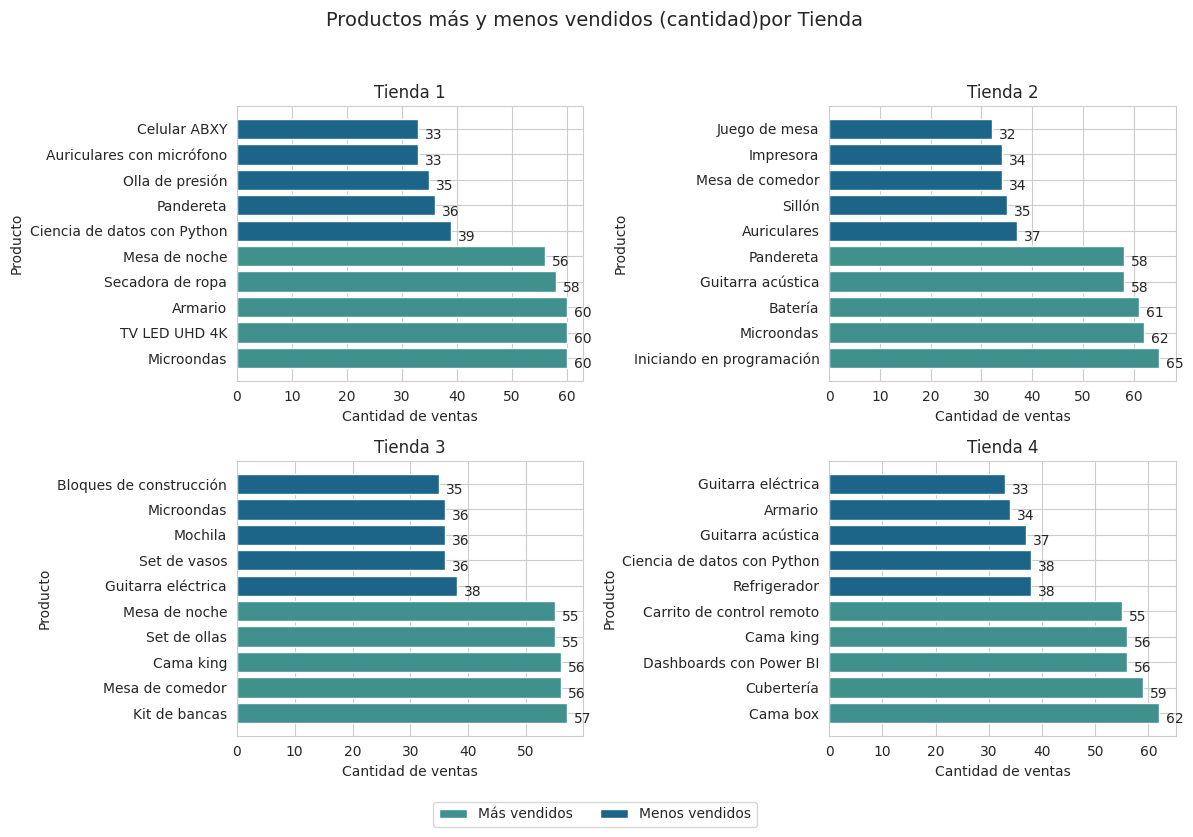

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ... (código para cargar los datos de las tiendas) ...

# Crear la figura y los subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Productos más y menos vendidos (cantidad)por Tienda', fontsize=14)

# Iterar sobre las tiendas y los subgráficos
for i, ax in enumerate(axes.flatten(), 1):
    productos_max_min = productos_por_tienda[i]
    top_5_mas_vendidos = productos_max_min.head(5)
    top_5_menos_vendidos = productos_max_min.tail(5)

    colors = sns.color_palette('crest')

    # Crear el gráfico de barras horizontales en el subgráfico actual (ax)
    ax.barh(top_5_mas_vendidos.index, top_5_mas_vendidos.values, color=[colors[2]], label="Más vendidos")
    ax.barh(top_5_menos_vendidos.index, top_5_menos_vendidos.values, color=[colors[4]], label="Menos vendidos")
    ax.set_title(f"Tienda {i}")
    ax.set_xlabel("Cantidad de ventas")
    ax.set_ylabel("Producto")

    # Agregar valores dentro de las barras
    for p in ax.patches:
        ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 0), textcoords='offset points')

# Colocar la leyenda por fuera del gráfico
handles, labels = ax.get_legend_handles_labels()  # Obtener handles y labels de la leyenda
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))  # Colocar la leyenda debajo del gráfico

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el diseño para evitar superposiciones con la leyenda
plt.show()

In [ ]:
# Productos con más ventas (Top N) -  Ingresos
for i, t in enumerate(tiendas_completas, 1):
    top_n = 5  # Define la cantidad de productos a mostrar (top N)

    # Agrupamos por producto, sumamos el precio y contamos las ventas
    productos_mas_vendidos = t.groupby("Producto").agg({"Precio": "sum", "Producto": "count"})

    # Renombramos las columnas antes de ordenar por Ingresos Totales
    productos_mas_vendidos = productos_mas_vendidos.rename(columns={"Precio": "Ingresos Totales", "Producto": "Cantidad de Ventas"})

    # Ordenamos por Ingresos Totales (de mayor a menor)
    productos_mas_vendidos = productos_mas_vendidos.sort_values("Ingresos Totales", ascending=False).head(top_n)

    # Imprimimos el resultado
    print(f"\nTop {top_n} productos con mas ingresos en la Tienda {i}:")

    # Aplicamos formato de moneda a la columna "Ingresos Totales"
    productos_mas_vendidos["Ingresos Totales"] = productos_mas_vendidos["Ingresos Totales"].map(lambda x: "${:,.2f}".format(x))

    # Reordenamos las columnas (opcional, si quieres "Ingresos Totales" primero)
    productos_mas_vendidos = productos_mas_vendidos[["Ingresos Totales", "Cantidad de Ventas"]]

    print(productos_mas_vendidos)


Top 5 productos con mas ingresos en la Tienda 1:
                 Ingresos Totales  Cantidad de Ventas
Producto                                             
TV LED UHD 4K     $142,150,200.00                  60
Refrigerador      $112,143,300.00                  54
Iphone 15          $97,902,200.00                  49
Smart TV           $67,452,100.00                  44
Lavadora de ropa   $65,783,600.00                  47

Top 5 productos con mas ingresos en la Tienda 2:
                 Ingresos Totales  Cantidad de Ventas
Producto                                             
Iphone 15         $113,225,800.00                  55
TV LED UHD 4K     $103,375,000.00                  45
Refrigerador       $97,632,500.00                  49
Lavadora de ropa   $66,762,300.00                  49
Smart TV           $61,142,000.00                  40

Top 5 productos con mas ingresos en la Tienda 3:
              Ingresos Totales  Cantidad de Ventas
Producto                                   

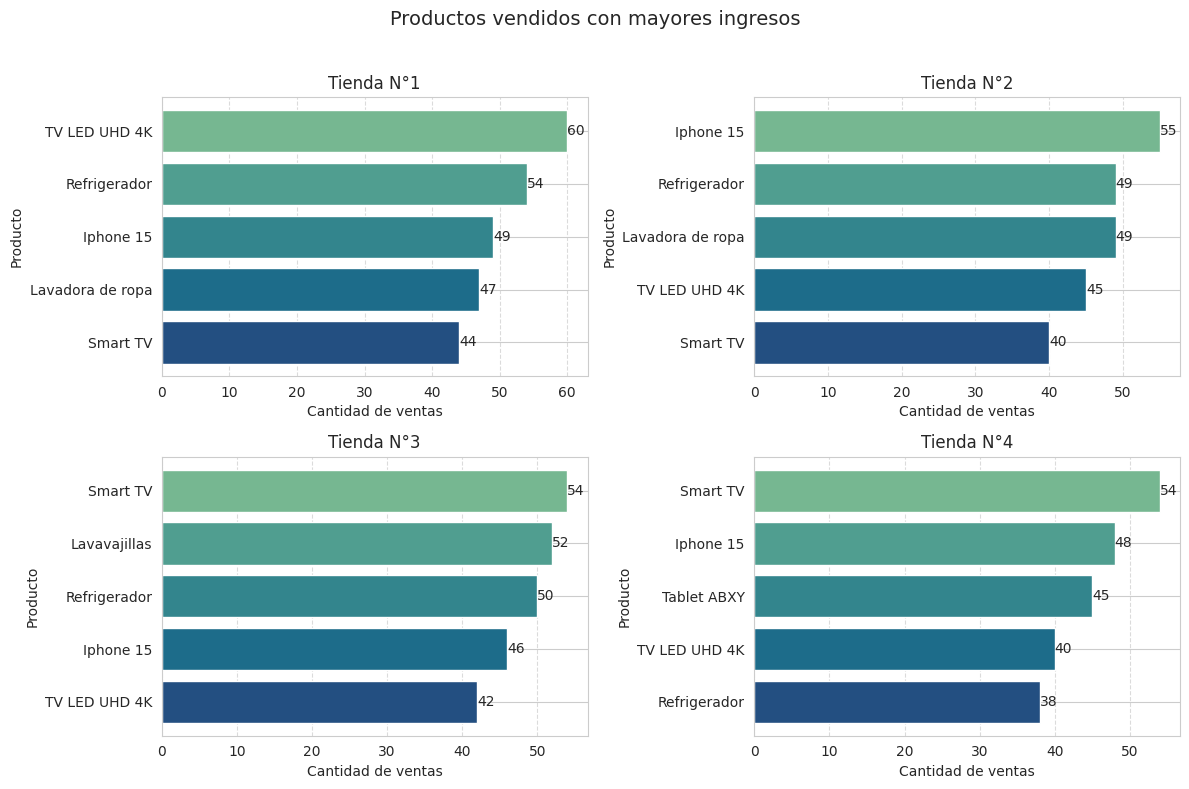

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ... (código para cargar los datos de las tiendas: tienda, tienda2, tienda3, tienda4) ...

# Función para graficar los productos más vendidos por tienda (CORREGIDA)
def graficar_productos_mas_vendidos(dataframes, nombres_tiendas, top_n=5):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Productos vendidos con mayores ingresos', fontsize=14)

    colores = sns.color_palette("crest", n_colors=top_n)

    for ax, df, nombre_tienda in zip(axes.flatten(), dataframes, nombres_tiendas):
        # Obtener los productos con mayor cantidad de ventas (CORREGIDO)
        productos_mas_vendidos = df.groupby("Producto").agg({"Precio": "sum", "Producto": "count"})
        productos_mas_vendidos = productos_mas_vendidos.sort_values("Precio", ascending=False).head(top_n)
        productos_mas_vendidos = productos_mas_vendidos.rename(columns={"Precio": "Ingresos Totales", "Producto": "Cantidad de Ventas"})
        productos_mas_vendidos = productos_mas_vendidos.sort_values("Cantidad de Ventas", ascending=False)

        # Obtener los nombres de los productos y la cantidad de ventas
        productos = productos_mas_vendidos.index
        cantidades = productos_mas_vendidos["Cantidad de Ventas"]

        # Crear el gráfico de barras horizontales con colores de Seaborn
        ax.barh(productos, cantidades, color=colores)
        ax.set_title(nombre_tienda, fontsize=12)
        ax.set_xlabel('Cantidad de ventas')
        ax.set_ylabel('Producto')
        ax.invert_yaxis()
        ax.grid(axis='x', linestyle='--', alpha=0.7)

        # Mostrar valores en las barras
        for i, v in enumerate(cantidades):
            ax.text(v, i, f"{int(v):,}", va='center', ha='left')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Lista de DataFrames y nombres de tiendas
dataframes = [tienda, tienda2, tienda3, tienda4]  # Reemplaza con tus DataFrames
nombres_tiendas = ["Tienda N°1", "Tienda N°2", "Tienda N°3", "Tienda N°4"]

# Llamar a la función para graficar los productos más vendidos
graficar_productos_mas_vendidos(dataframes, nombres_tiendas)

In [ ]:
# Productos menos vendidos (Top N)
for i, t in enumerate(tiendas_completas, 1):
    top_n = 5  # Define la cantidad de productos a mostrar (top N)

    # Agrupamos por producto, sumamos el precio y contamos las ventas
    productos_menos_vendidos = t.groupby("Producto").agg({"Precio": "sum", "Producto": "count"})
    # Renombramos la columna "Producto" (cantidad de ventas) antes de ordenar
    productos_menos_vendidos = productos_menos_vendidos.rename(columns={"Producto": "Cantidad_Ventas"})
    # Ordenamos por la columna "Cantidad_Ventas" (que representa la cantidad de ventas) y seleccionamos las columnas
    productos_menos_vendidos = productos_menos_vendidos.sort_values("Cantidad_Ventas", ascending=True)[["Cantidad_Ventas", "Precio"]].head(top_n)
    # Renombramos las columnas a los nombres finales
    productos_menos_vendidos = productos_menos_vendidos.rename(columns={"Precio": "Ingresos Totales", "Cantidad_Ventas": "Cantidad de Ventas"})

    # Imprimimos el resultado
    print(f"\nTop {top_n} productos menos vendidos y sus ingresos en la Tienda {i}:")

    # Aplicamos formato de moneda a la columna "Ingresos Totales"
    productos_menos_vendidos["Ingresos Totales"] = productos_menos_vendidos["Ingresos Totales"].map(lambda x: "${:,.2f}".format(x))
    print(productos_menos_vendidos)


Top 5 productos menos vendidos y sus ingresos en la Tienda 1:
                             Cantidad de Ventas Ingresos Totales
Producto                                                        
Auriculares con micrófono                    33    $4,730,800.00
Celular ABXY                                 33   $32,651,000.00
Olla de presión                              35    $2,629,300.00
Pandereta                                    36    $2,238,900.00
Ciencia de datos con Python                  39    $2,063,600.00

Top 5 productos menos vendidos y sus ingresos en la Tienda 2:
                 Cantidad de Ventas Ingresos Totales
Producto                                            
Juego de mesa                    32    $5,811,900.00
Impresora                        34   $10,385,300.00
Mesa de comedor                  34    $8,637,500.00
Sillón                           35    $8,413,500.00
Auriculares                      37    $3,569,600.00

Top 5 productos menos vendidos y sus ingresos e

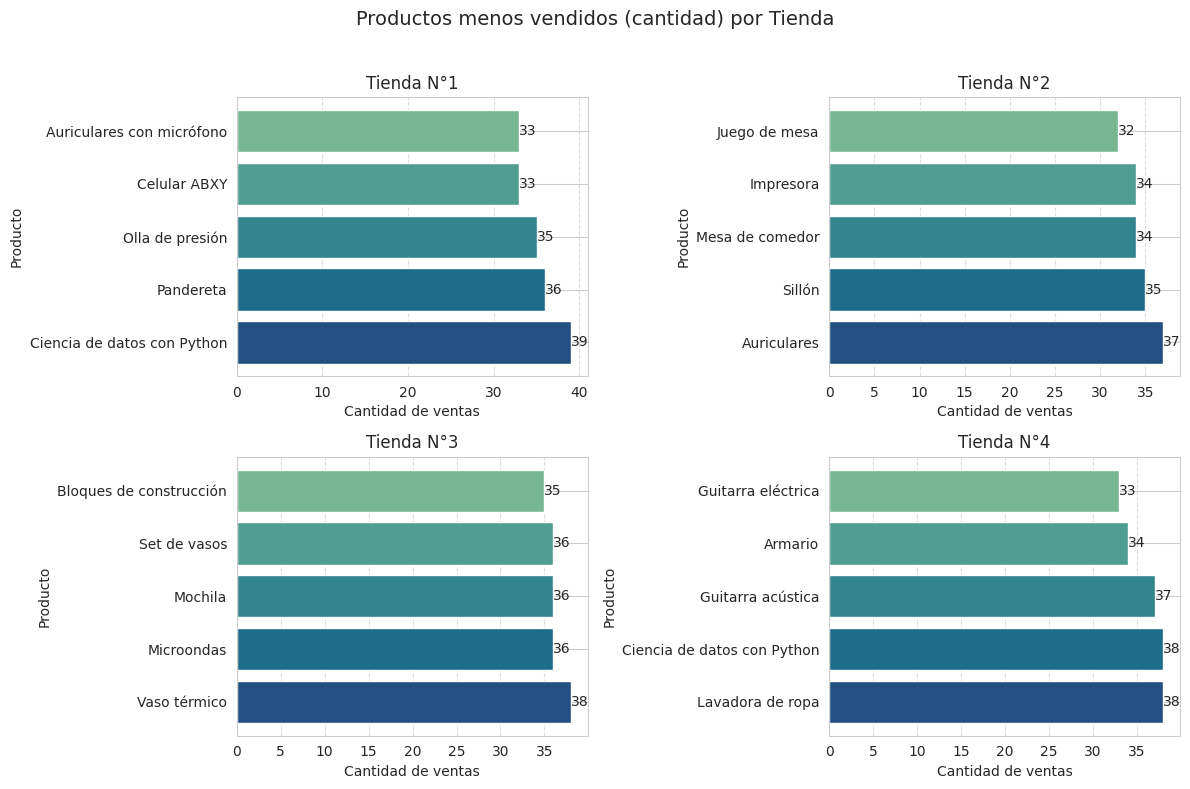

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ... (código para cargar los datos de las tiendas: tienda, tienda2, tienda3, tienda4) ...

# Función para graficar los productos menos vendidos por tienda
def graficar_productos_menos_vendidos(dataframes, nombres_tiendas, top_n=5):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Productos menos vendidos (cantidad) por Tienda', fontsize=14) # Cambiamos el título

    colores = sns.color_palette("crest", n_colors=top_n)

    for ax, df, nombre_tienda in zip(axes.flatten(), dataframes, nombres_tiendas):
        # Obtener los productos con menor cantidad de ventas
        productos_menos_vendidos = df.groupby("Producto").agg({"Precio": "sum", "Producto": "count"})
        productos_menos_vendidos = productos_menos_vendidos.rename(columns={"Producto": "Cantidad_Ventas"})
        productos_menos_vendidos = productos_menos_vendidos.sort_values("Cantidad_Ventas", ascending=True)[["Cantidad_Ventas", "Precio"]].head(top_n)
        productos_menos_vendidos = productos_menos_vendidos.rename(columns={"Precio": "Ingresos Totales", "Cantidad_Ventas": "Cantidad de Ventas"})

        # Obtener los nombres de los productos y la cantidad de ventas
        productos = productos_menos_vendidos.index
        cantidades = productos_menos_vendidos["Cantidad de Ventas"]

        # Crear el gráfico de barras horizontales con colores de Seaborn
        ax.barh(productos, cantidades, color=colores)
        ax.set_title(nombre_tienda, fontsize=12)
        ax.set_xlabel('Cantidad de ventas')
        ax.set_ylabel('Producto')
        ax.invert_yaxis()
        ax.grid(axis='x', linestyle='--', alpha=0.7)

        # Mostrar valores en las barras
        for i, v in enumerate(cantidades):
            ax.text(v, i, f"{int(v):,}", va='center', ha='left')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Lista de DataFrames y nombres de tiendas
dataframes = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda N°1", "Tienda N°2", "Tienda N°3", "Tienda N°4"]

# Llamar a la función para graficar los productos menos vendidos
graficar_productos_menos_vendidos(dataframes, nombres_tiendas)

# 5. Envío promedio por tienda

In [ ]:
from os import fork
# ... (código para cargar los datos de las tiendas) ...

# Costo de envío promedio por tienda
costo_envio_promedio_por_tienda = []  # Lista para almacenar el costo promedio por tienda

for i, t in enumerate(tiendas_completas, 1):
    costo_envio_promedio = t["Costo de envío"].mean()
    costo_envio_promedio_por_tienda.append(costo_envio_promedio)  # Agregar a la lista

    # Formato de moneda usando format()
    formatear_costo = "${:,.2f}".format(costo_envio_promedio)  # Formato con símbolo de dólar, separador de miles y 2 decimales
    print(f"\nCosto de envío promedio en la Tienda {i}: {formatear_costo}")


Costo de envío promedio en la Tienda 1: $26,018.61

Costo de envío promedio en la Tienda 2: $25,216.24

Costo de envío promedio en la Tienda 3: $24,805.68

Costo de envío promedio en la Tienda 4: $23,459.46


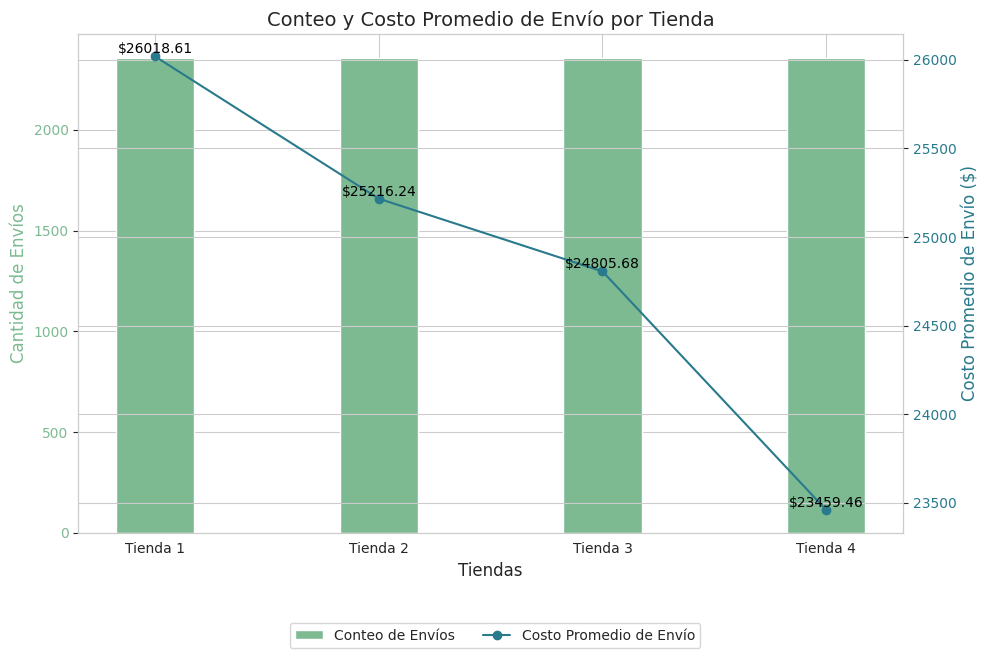

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ... (código para cargar los datos de las tiendas) ...

# Estilo visual
sns.set_style("whitegrid")
# Obtener la paleta 'crest'
paleta_pastel = sns.color_palette("crest")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Datos base
tiendas = [f"Tienda {i}" for i in range(1, 5)]
conteo = [len(t) for t in tiendas_completas]  # Conteo de envíos
promedio = costo_envio_promedio_por_tienda  # Costo promedio de envío

# Ancho de la barra
ancho_barra = 0.35

# Crear el gráfico de barras para el conteo de envíos con ancho personalizado
ax1.bar(tiendas, conteo, color=paleta_pastel[0], label='Conteo de Envíos', width=ancho_barra)
ax1.set_xlabel('Tiendas', fontsize=12)
ax1.set_ylabel('Cantidad de Envíos', fontsize=12, color=paleta_pastel[0])
ax1.tick_params(axis='y', labelcolor=paleta_pastel[0])

# Crear un segundo eje y para el costo promedio de envío
ax2 = ax1.twinx()
ax2.plot(tiendas, promedio, marker='o', linestyle='-', color=paleta_pastel[3], label='Costo Promedio de Envío')
ax2.set_ylabel('Costo Promedio de Envío ($)', fontsize=12, color=paleta_pastel[3])
ax2.tick_params(axis='y', labelcolor=paleta_pastel[3])

# Colocar valores en los puntos de costo promedio
for i, val in enumerate(promedio):
    ax2.text(tiendas[i], val + 0.2, f'${val:.2f}', ha='center', va='bottom', color='black', fontsize=10)

# Títulos y leyenda
plt.title('Conteo y Costo Promedio de Envío por Tienda', fontsize=14, fontweight='normal')

# Mostrar leyenda en la parte inferior central
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=2)

fig.tight_layout()
plt.show()

# **EXTRA: análisis del desempeño geográfico**

**Ciudades donde se realizan las ventas y su total de ventas**

In [ ]:
import pandas as pd
from tabulate import tabulate

# ... (código anterior para cargar datos, crear la tabla_resumida y agregar 'Coordenadas') ...

# Combinar los datos de todas las tiendas
all_tiendas_df = pd.concat(tiendas_completas, keys=[f"Tienda {i}" for i in range(1, 5)])
all_tiendas_df = all_tiendas_df.reset_index(level=0).rename(columns={'level_0': 'Tienda'})

# Agrupar por ciudad y tienda, contar las ventas y obtener latitud y longitud
ventas_por_ciudad = all_tiendas_df.groupby(['Lugar de Compra', 'Tienda'])['Producto'].count().reset_index(name='Cantidad de Ventas')
ventas_por_ciudad = pd.merge(ventas_por_ciudad, all_tiendas_df[['Lugar de Compra', 'lat', 'lon']].drop_duplicates(), on='Lugar de Compra', how='left')

# Pivotar la tabla para mostrar las ventas por tienda en cada ciudad
tabla_resumida = ventas_por_ciudad.pivot_table(index=['Lugar de Compra', 'lat', 'lon'],
                                              columns='Tienda',
                                              values='Cantidad de Ventas',
                                              fill_value=0)
tabla_resumida = tabla_resumida.reset_index()  # Primero, restablecer el índice
tabla_resumida.columns.name = None  # Luego, establecer el nombre de la columna del índice a None

# Agregar una columna con el total de ventas por ciudad
tabla_resumida['Total Ventas'] = tabla_resumida[['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']].sum(axis=1)

# Combinar 'lat' y 'lon' en una nueva columna 'Coordenadas'
tabla_resumida['Coordenadas'] = tabla_resumida.apply(lambda row: f"({row['lat']}, {row['lon']})", axis=1)

# Eliminar las columnas 'lat' y 'lon' individuales
tabla_resumida = tabla_resumida.drop(columns=['lat', 'lon'])

# Reordenar las columnas para que 'Lugar de Compra' sea la primera
tabla_resumida = tabla_resumida[['Lugar de Compra', 'Total Ventas', 'Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4', 'Coordenadas']]

# Mostrar la tabla con tabulate
print(tabulate(tabla_resumida, headers='keys', tablefmt='grid', showindex=False))

+-------------------+----------------+------------+------------+------------+------------+-----------------------+
| Lugar de Compra   |   Total Ventas |   Tienda 1 |   Tienda 2 |   Tienda 3 |   Tienda 4 | Coordenadas           |
+===================+================+============+============+============+============+=======================+
| Armenia           |             28 |         14 |          4 |          7 |          3 | (4.53389, -75.68111)  |
+-------------------+----------------+------------+------------+------------+------------+-----------------------+
| Barranquilla      |            310 |         75 |         78 |         77 |         80 | (10.96854, -74.78132) |
+-------------------+----------------+------------+------------+------------+------------+-----------------------+
| Bogotá            |           3943 |        984 |        985 |        983 |        991 | (4.60971, -74.08175)  |
+-------------------+----------------+------------+------------+------------+---

**Mapa de dispersion que muestra las ciudades donde se realizan las ventas (para todas las tiendas)**

In [ ]:
import plotly.express as px
import pandas as pd
import plotly.io as pio

# Configuración del renderizador para Colab
pio.renderers.default = "colab"

# ... (código anterior para cargar datos y crear tabla_resumida) ...

# Extraer latitud y longitud de la columna "Coordenadas"
tabla_resumida[['lat', 'lon']] = tabla_resumida['Coordenadas'].str.extract(r'\(([-\d.]+), ([-\d.]+)\)').astype(float)

# Crear el mapa de calor
fig = px.density_mapbox(tabla_resumida, z='Total Ventas', lat='lat', lon='lon',
                        hover_name='Lugar de Compra',
                        hover_data=['Total Ventas', 'Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
                        center=dict(lat=4.5709, lon=-74.2973),  # Centrar en Colombia
                        zoom=4,
                        mapbox_style="open-street-map",  # Cambiar el estilo de mapa
                        radius=40,
                        color_continuous_scale="Viridis"
                       )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Mapa que muestra las ciudades donde se realizan las ventas (para todas las tiendas)**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# ... (código anterior para cargar datos y crear tabla_resumida) ...

# Seleccionar las columnas de latitud y longitud
X = tabla_resumida[['lat', 'lon']]

# Definir el número de clústeres
n_clusters = 5  # Ajusta este valor según tus necesidades

# Crear el modelo de KMeans
kmeans = KMeans(n_clusters=n_clusters)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas de los clústeres
tabla_resumida['Cluster'] = kmeans.labels_

# Visualizar los clústeres en un gráfico de dispersión
fig = px.scatter_mapbox(tabla_resumida, lat="lat", lon="lon", color="Cluster",
                        hover_name="Lugar de Compra", hover_data=["Total Ventas"],
                        zoom=4, mapbox_style="open-street-map",
                        title="Clústeres de ciudades con patrones de ventas similares"
                       )
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

**Informe de Análisis y Recomendación: Evaluación de Tiendas de Alura Store**

**Introducción**

El presente informe tiene como objetivo brindar soporte al cliente en la toma de decisiones respecto a cuál de las cuatro tiendas de Alura Store debería vender, con el fin de obtener fondos para un nuevo emprendimiento. Para ello, se analizaron diversas variables: ingresos totales, tipos y volúmenes de productos vendidos, calificaciones otorgadas por los clientes, costos de envío y aspectos geográficos asociados a la operación de cada tienda.

El análisis se organiza en cinco secciones temáticas, acompañadas por visualizaciones que respaldan los hallazgos. Al final, se presenta una recomendación basada en los datos.

**Desarrollo del Análisis**

**1. Ingresos Totales por Tienda**

Los ingresos generados por las tiendas son bastante similares entre las tiendas 1, 2 y 3, con una ligera ventaja para la tienda 1, que presenta el mayor volumen de ingresos. La tienda 4, en cambio, registra un nivel significativamente menor.

Cabe mencionar que la tienda 4 cuenta con un registro menos en comparación con las otras tiendas, lo que podría tener un leve impacto en el total. Sin embargo, al tratarse de un solo registro, dicha diferencia probablemente no sea significativa. Aun considerando esta compensación hipotética, la tienda 4 sigue siendo la que menor volumen de ingresos presenta.

**2. Categorías de Productos Más y Menos Vendidas**

Del análisis de las ventas por categoría, se observa que los productos más vendidos corresponden a muebles, electrónicos, juguetes y electrodomésticos, en ese orden. Este comportamiento es consistente en casi todas las tiendas, salvo en la tienda 4, donde los artículos de deportes y diversión superan a los electrodomésticos en ventas.

Las categorías mencionadas representan más del 50% del volumen total de facturación y de unidades vendidas, como se observa en la gráfica de torta correspondiente. Por el contrario, los productos menos solicitados incluyen artículos para el hogar, libros e instrumentos musicales.

**3. Calificaciones Promedio por Tienda**

En cuanto a la experiencia del cliente, la tienda mejor calificada es la Tienda 3, mientras que la Tienda 1 presenta la calificación promedio más baja. Sin embargo, las diferencias entre tiendas no son pronunciadas.

La gráfica muestra que la tienda 3 es la que acumula mayor cantidad de calificaciones de 5 puntos, mientras que la tienda 1 concentra la mayoría de las calificaciones de 1 punto, lo cual puede ser un indicador de deficiencias en el servicio o en la atención al cliente.

**4. Productos Más y Menos Vendidos**

Al considerar los diez productos más y menos vendidos por tienda, se observa una alta variabilidad. Algunos productos figuran entre los más vendidos en una tienda y entre los menos vendidos en otra, lo que dificulta establecer patrones claros a nivel de producto específico. No obstante, la coincidencia general en las categorías más populares aporta un marco de referencia útil.

**5. Costo de Envío Promedio**

La tienda 1 presenta el costo promedio de envío más alto (aproximadamente 26.000), mientras que la tienda 4 ofrece el costo promedio más bajo (algo por encima de los 23.000). Este aspecto podría considerarse como una de las principales fortalezas de la tienda 4.

No queda claro si los costos de envío son asumidos por el cliente o por la tienda, ni se dispone de información suficiente para determinar si las diferencias se deben a factores logísticos, ubicación geográfica o acuerdos con empresas de transporte.

**6. Variable Geográfica**

Todas las tiendas realizan envíos a las mismas ciudades. Las ciudades con mayor volumen de ventas son Bogotá, Medellín, Cali y Pereira, en ese orden. Los diagramas de dispersión muestran que no existen diferencias significativas entre tiendas en cuanto al destino de los envíos.

Dado que no se conoce la ubicación física de cada tienda, no fue posible establecer si alguna de ellas goza de ventajas logísticas por su localización.

**Conclusión y Recomendación**

En resumen, los datos analizados indican que no existen diferencias marcadas entre las tiendas en la mayoría de los aspectos considerados. No obstante, la tienda 4 presenta un desempeño inferior en términos de ingresos, lo cual podría justificar su selección como candidata a ser vendida, si se prioriza este criterio económico.

Sin embargo, si se da mayor peso a variables como la satisfacción del cliente o la eficiencia logística, también podrían considerarse las tiendas 2 y 3 como opciones viables para la venta. En este contexto, la tienda 1 no debería ser vendida, ya que lidera en ingresos y podría beneficiarse de mejoras en atención al cliente y optimización logística.

**Recomendación final:**

Se recomienda al Sr. Juan considerar la venta de la tienda 4 como primera opción. No obstante, si su decisión incorpora criterios adicionales a la facturación, podría analizar con mayor profundidad el desempeño de las tiendas 2 y 3. En cualquier caso, la tienda 1 debe mantenerse en operación, acompañada de un plan de mejora para elevar su calificación promedio y fortalecer su proceso de envíos.

